In [61]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm



Read CSV building_117_roof_01_door01_modified.csv

In [2]:
#Reading CSV File, Building_01, which is actually building_0000 
df = pd.read_csv('building_117_roof_01_door01_modified.csv', header=0, names = ['X','Y','Z','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
#df1 = df.dropna() 
#df2 = df1.values
df.info()
print(df.shape)
#print(df2[:, 14])
from sklearn.utils import resample 
df_majority = df[df.Type == 'roof']
df_minority = df[df.Type == 'door'] 

#print(df_majority)
#downsampling majority class 

df_majority_downsampled = resample(df_majority, replace = False, n_samples = 7000, random_state=123)
#df_minority_downsampled = resample(df_minority, replace = False, n_samples = 7000, random_state=123)
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 7000, random_state=123)
#df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_downsampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

#display class counts 
df_downsampled.Type.value_counts()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17877 entries, (315996.748, 234680.7109, 16.31999969) to (315991.964, 234675.4639, 5.33199978)
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17877 non-null  int64  
 1   Y                  17877 non-null  int64  
 2   Z                  17877 non-null  int64  
 3   Point_Source_ID    17877 non-null  int64  
 4   Scan_Angle_Rank    17877 non-null  int64  
 5   Flightline_Edge    17877 non-null  int64  
 6   Scan_Direction     17877 non-null  int64  
 7   Number_of_Returns  17877 non-null  int64  
 8   Return_Number      17877 non-null  int64  
 9   Time               17877 non-null  float64
 10  Intensity          17877 non-null  int64  
 11  Classification     17877 non-null  int64  
 12  Type               17877 non-null  object 
dtypes: float64(1), int64(11), object(1)
memory usage: 2.6+ MB
(17877, 13)


roof    7000
door    7000
Name: Type, dtype: int64

Apply downsampled column to new dataset 

In [3]:
#with downsampling, and normalization
xOld = df_downsampled.drop('Type', axis = 1)
#print(x)
y = df_downsampled.Type
#print(y)
#print(x.shape,y.shape)
#print(y.shape)

scaler = preprocessing.StandardScaler().fit(xOld)
scaler.mean_
scaler.scale_
x = scaler.transform(xOld)

x.mean(axis = 0)
x.std(axis=0)

#print(x.shape)

array([1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.])

Train Test Split    

In [4]:
#Train/Test Split
x_scaled = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)

#print(x_train)
#Making sure that 
y_train=y_train.astype('str')
y_test = y_test.astype('str')
print(x_train.shape, x_test.shape)
#print(y_train)

(10500, 12) (3500, 12)


Read CSV #2 - building_02_roof_doors.csv

In [5]:
#Reading CSV File #2, Building_0000001 txt 
df_a =  pd.read_csv('building_02_roof_doors.csv',sep = ',',header = 0,names = ['X','Y','Z','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df_a1 = df_a.dropna() 
df_a2 = df_a1.values
#print(df_a)
df_a.info()
#print(df_a['Z'])
'''
#Reading CSV File #2, Building_0000001 txt 
df_b = pd.read_csv('Buildings_000002.txt',sep = ' ')
df_b1 = df_b.dropna() 
df_b2 = df_b1.values
'''

#Normalizing two other data sets
#For building 000001
x1Old = df_a2[:, :12] 
y1 = df_a2[:, 12] 

scaler = preprocessing.StandardScaler().fit(x1Old)
x1 = scaler.transform(x1Old)

print(x1)
'''
#For building 000002
x2Old = df_b2[:, :14] 
y2 = df_b2[:, 14] 

scaler = preprocessing.StandardScaler().fit(x2Old)
x2 = scaler.transform(x2Old)
'''

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 58375 entries, (315714.5031, 234789.8271, 17.40099907) to (315729.582, 234792.1299, 7.62400007)
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  58375 non-null  int64  
 1   Y                  58375 non-null  int64  
 2   Z                  58375 non-null  int64  
 3   Point_Source_ID    58375 non-null  int64  
 4   Scan_Angle_Rank    58375 non-null  int64  
 5   Flightline_Edge    58375 non-null  int64  
 6   Scan_Direction     58375 non-null  int64  
 7   Number_of_Returns  58375 non-null  int64  
 8   Return_Number      58375 non-null  int64  
 9   Time               58375 non-null  float64
 10  Intensity          58375 non-null  int64  
 11  Classification     58375 non-null  int64  
 12  Type               58375 non-null  object 
dtypes: float64(1), int64(11), object(1)
memory usage: 7.5+ MB
[[-1.13233597e-01  1.13233597e-01  0.0

'\n#For building 000002\nx2Old = df_b2[:, :14] \ny2 = df_b2[:, 14] \n\nscaler = preprocessing.StandardScaler().fit(x2Old)\nx2 = scaler.transform(x2Old)\n'

In [58]:
forest = RandomForestClassifier(n_estimators=2)
forest.fit(x_train, y_train)

train_rf_predictions = forest.predict(x_train)
train_rf_probs = forest.predict_proba(x_train)[:, 1]

test_rf_predictions = forest.predict(x_test)
test_rf_probs = forest.predict_proba(x_test)[:, 1]
print(test_rf_predictions)
print(test_rf_probs)

# Calculate roc auc, area under the curve 
roc_value = roc_auc_score(y_test, rf_probs)
print(roc_value)

['roof' 'door' 'roof' ... 'door' 'door' 'roof']
[1. 0. 1. ... 0. 0. 1.]
1.0


In [59]:
num_nodes = [] 
max_depth = []
for ind in forest.estimators_: 
    num_nodes.append(ind.tree_.node_count)
    max_depth.append(ind.tree_.max_depth)
print('Total Tree Nodes:',sum(num_nodes))
print('Tree Depth:',max(max_depth))

Total Tree Nodes: 16
Tree Depth: 3


Confusion matrix, without normalization
[[  739     0]
 [    0 57636]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


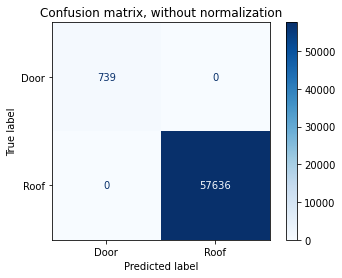

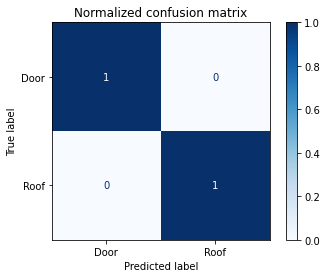

In [60]:
#Confusion Matrix - Random Forest

np.set_printoptions(precision=2)
class_names = ['Door','Roof']
classifier = forest #svm.SVC(probability = False, kernel = 'linear', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>